In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_flux/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
pot_data = 8.649e+18

outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
#RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");


# check flux histograms

In [3]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [5]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/zarko/'
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/tmp/'
f_flux = ROOT.TFile.Open(path+"All_flux_zarko.root", 'read')
#f_flux = ROOT.TFile.Open(path+"fluxreader.root_histo.root", 'read')


In [6]:
weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]


In [7]:
weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]
num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para

Nuber of parameters:  13


MeV:  0  flux: 0  sigma: 0.000  sigma: 0.000
MeV:  50  flux: 3.09e-12  sigma: 1.243  sigma: 0.879
MeV:  100  flux: 1.16e-11  sigma: 1.041  sigma: 0.736
MeV:  150  flux: 1.49e-11  sigma: 0.856  sigma: 0.605
MeV:  200  flux: 1.8e-11  sigma: 0.687  sigma: 0.486
MeV:  250  flux: 2.24e-11  sigma: 0.467  sigma: 0.330
MeV:  300  flux: 2.45e-11  sigma: 0.357  sigma: 0.252
MeV:  350  flux: 2.62e-11  sigma: 0.250  sigma: 0.177
MeV:  400  flux: 2.74e-11  sigma: 0.166  sigma: 0.117
MeV:  450  flux: 2.91e-11  sigma: 0.126  sigma: 0.089
MeV:  500  flux: 3.03e-11  sigma: 0.102  sigma: 0.072
MeV:  550  flux: 3.09e-11  sigma: 0.092  sigma: 0.065
MeV:  600  flux: 3.1e-11  sigma: 0.072  sigma: 0.051
MeV:  650  flux: 3.07e-11  sigma: 0.068  sigma: 0.048
MeV:  700  flux: 3.03e-11  sigma: 0.066  sigma: 0.046
MeV:  750  flux: 2.99e-11  sigma: 0.062  sigma: 0.044
MeV:  800  flux: 2.92e-11  sigma: 0.069  sigma: 0.049
MeV:  850  flux: 2.81e-11  sigma: 0.071  sigma: 0.050
MeV:  900  flux: 2.71e-11  sigma: 0.079 

"for i in range(1,60+1):\n    flux_cv = h_cv.Integral(i,i+1)\n    #flux_cv = flux_cv/(NumberOfFiles*POT_file*fidVol_Area)*20\n    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.Integral(i,i))\n    #print ' - MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.GetBinContent(i+1))\n"

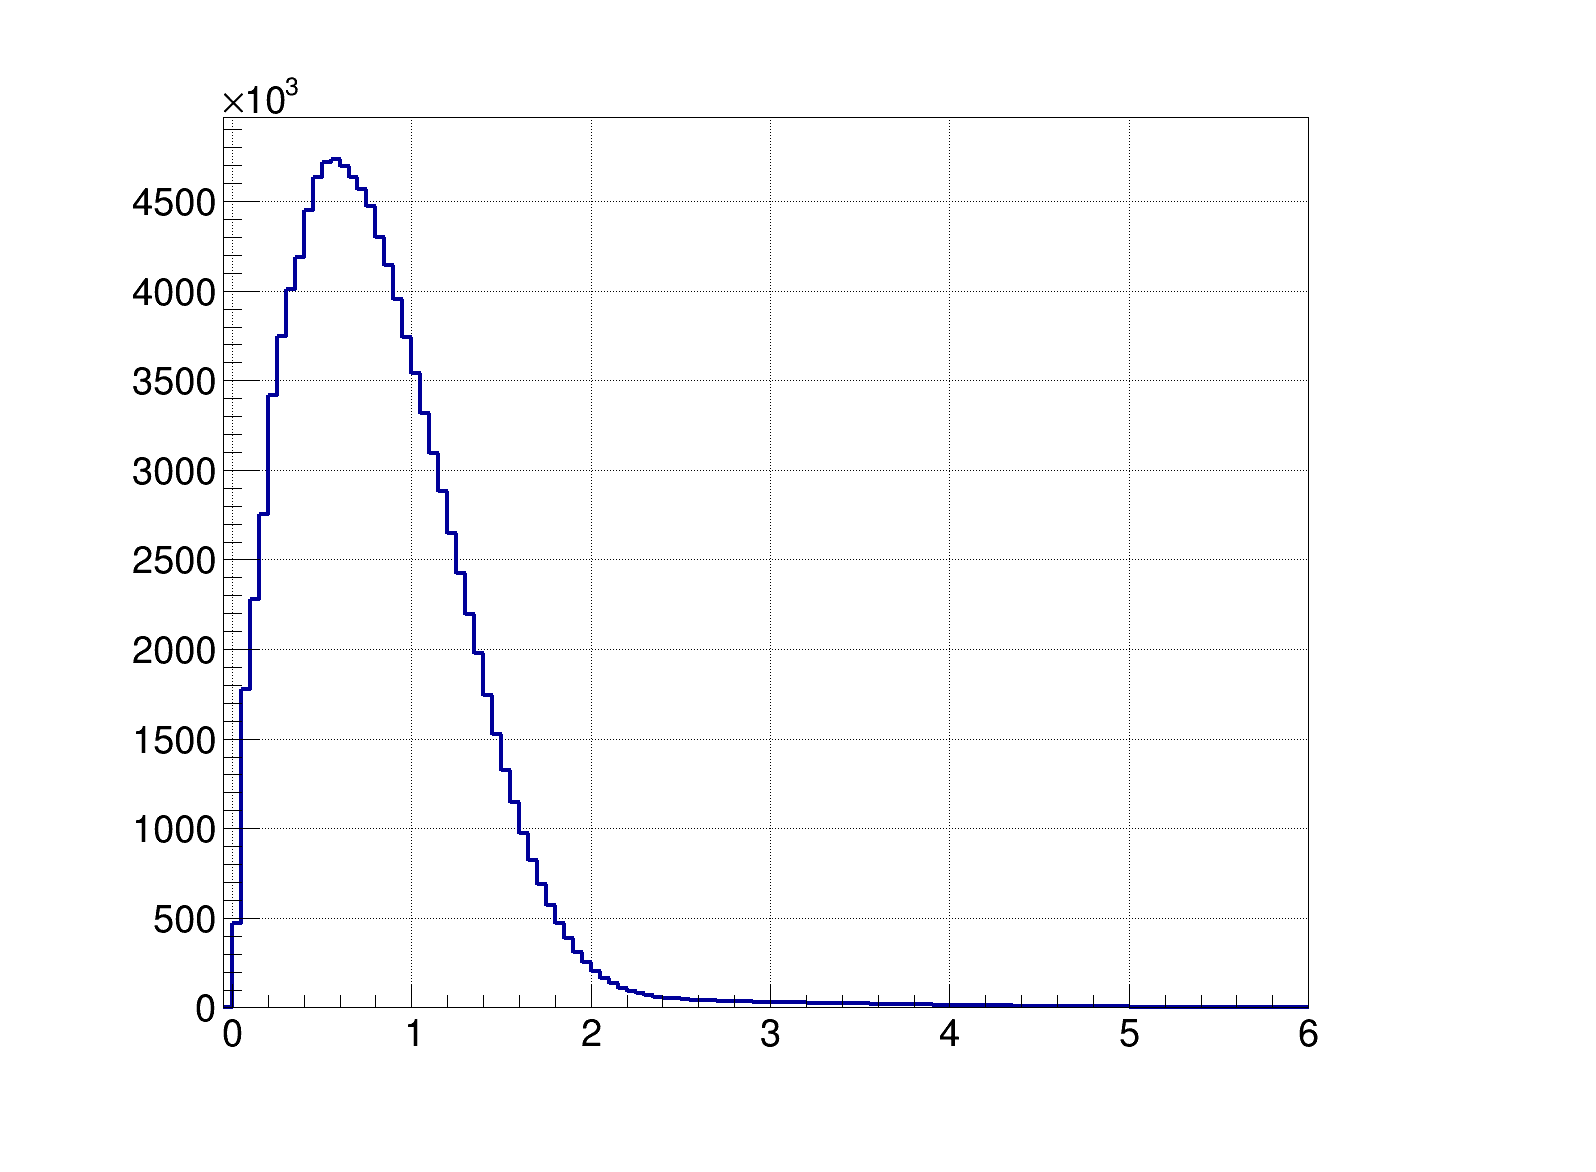

In [8]:
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_cv = f_flux.Get("hEnumu_cv")
#h_flux_var0 = f_flux.Get('numu/'+weight_list_flux[0]\
#                                +'/Active_TPC_Volume/numu_'+weight_list_flux[0]\
#                                +'_Uni_'+str(1)+'_FV_TPC')
#NumberOfFiles = 4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 236.35 * 213.0
active_Area = 128.175*2*116.5*2
#h_cv.Scale(1/(NumberOfFiles*POT_file*active_Area))
h_cv.Draw()
h_cv.GetXaxis().SetRange(0,120);
h_cv.SetLineWidth(4)
c1.Draw()

all_tot_para = 0.0
weight_list_flux = ['total']
num_para = 1
NumberOfFiles = 5120
num_universes = 1000
flux_tot = np.zeros((num_para,num_universes))
for i in range(0,161):
    flux_var = np.zeros((num_para,num_universes))
    flux_cv = h_cv.Integral(i,i)
    tot_err = 0.0
    tot_std = 0.0
    tot_para = 0.0
    for para in range(num_para):
        flux_varp = np.zeros((num_universes))
        flux_sigma_para = 0.0
        for uni in range(num_universes):
            #h_flux_var = f_flux.Get('numu_ms_'+weight_list_flux[para]\
            #                    +'/hEnumu_'+weight_list_flux[para]\
            #                    +'_ms_'+str(uni))
            h_flux_var = f_flux.Get('numu_ms_'+weight_list_flux[para]\
                                +'/hEnumu_'+'ms_'+str(uni))
            #h_flux_var.Scale(1.0/(NumberOfFiles*POT_file*active_Area))
            flux_var = h_flux_var.Integral(i,i)#/(NumberOfFiles*POT_file*active_Area)
            flux_varp[uni] = flux_var - flux_cv
            flux_tot[para][uni] = flux_var
            flux_sigma_para = flux_sigma_para+ (flux_var - flux_cv)*(flux_var - flux_cv)
            
        para_err = np.std(flux_varp)
        para_std = np.std(flux_tot[para])
        #print para_err
        #print para_std
        #print math.sqrt(np.mean(abs(flux_tot[para] - flux_tot[para].mean())**2))
        #print math.sqrt(np.mean(abs(flux_tot[para] - flux_cv)**2))
        #print para_err/flux_cv
        tot_err = tot_err + para_err*para_err
        tot_std = tot_std + para_std*para_std
        tot_para = tot_para + flux_sigma_para/num_universes
        #print math.sqrt(flux_sigma_para/num_universes)
    all_tot_para = all_tot_para+tot_para#*(h_cv.Integral(i,i))*(h_cv.Integral(i,i))
        
    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.Integral(i,i)/(NumberOfFiles*POT_file*active_Area)),\
        ' sigma: {0:0.3f}'.format(math.sqrt(tot_para)/(h_cv.Integral(i,i)+1e-80)),\
        ' sigma: {0:0.3f}'.format(1/math.sqrt(2)*math.sqrt(tot_para)/(h_cv.Integral(i,i)+1e-80))
        #' fratcional difference: {0:0.3f}'.format(math.sqrt(tot_err)/(h_cv.Integral(i,i)+1e-80)),\
        #' std: {0:0.3f}'.format(math.sqrt(tot_std)/(h_cv.Integral(i,i)+1e-80)),\
        #' sigma: {0:0.3f}'.format(math.sqrt(tot_para)/(h_cv.Integral(i,i)+1e-80))
    
print  'sigma all: {0:0.5f}'.format(math.sqrt(all_tot_para/(h_cv.Integral(0,161)+1e-80)))#/(h_cv.Integral(0,200)+1e-80))
print  'sigma all: {0:0.5f}'.format(math.sqrt(all_tot_para/(h_cv.Integral(0,161)+1e-80))/161)
'''for i in range(1,60+1):
    flux_cv = h_cv.Integral(i,i+1)
    #flux_cv = flux_cv/(NumberOfFiles*POT_file*fidVol_Area)*20
    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.Integral(i,i))
    #print ' - MeV: ',50*i,' flux: {0:0.3g}'.format(h_cv.GetBinContent(i+1))
'''

In [14]:
print h_cv.GetMean()
print h_cv.GetMaximum()
binmax = h_cv.GetMaximumBin() # double x = h->GetXaxis()->GetBinCenter(binmax)
print binmax*50

0.822855547451
4734282.0
600


In [9]:
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_cv = f_flux.Get("hEnumu_cv")
#lux_cv = 
all_tot_para = 0.0

num_universes = 1000
for i in range(0,161):
    for para in range(num_para):
        sig_para = 0.0
        for uni in range(num_universes):
            h_flux_var = f_flux.Get('numu_ms_'+weight_list_flux[para]\
                                +'/hEnumu_'+weight_list_flux[para]\
                                +'_ms_'+str(uni))
            #h_flux_var.Scale(1.0/(NumberOfFiles*POT_file*active_Area))
            flux_var = h_flux_var.Integral(i,i)#/(NumberOfFiles*POT_file*active_Area)
            sigma = flux_var - h_cv.Integral(i,i)
            sig_para = sig_para + sigma*sigma
        sig_para = sig_para/num_universes

AttributeError: 'TObject' object has no attribute 'Integral'

In [10]:
print flux

110078624.0


In [11]:
NumberOfFiles = 5000
h_flux_cv = f_flux.Get("hEnumu_cv")
for i in range(30):
    flux_cv = h_flux_cv.Integral(i,i+1)
    flux_cv = flux_cv/(NumberOfFiles*POT_file*active_Area)#*20
    print 'MeV: ',50*i,' flux: {0:0.3g}'.format(flux_cv)

MeV:  0  flux: 3.17e-12
MeV:  50  flux: 1.51e-11
MeV:  100  flux: 2.72e-11
MeV:  150  flux: 3.37e-11
MeV:  200  flux: 4.13e-11
MeV:  250  flux: 4.8e-11
MeV:  300  flux: 5.19e-11
MeV:  350  flux: 5.49e-11
MeV:  400  flux: 5.79e-11
MeV:  450  flux: 6.08e-11
MeV:  500  flux: 6.27e-11
MeV:  550  flux: 6.33e-11
MeV:  600  flux: 6.31e-11
MeV:  650  flux: 6.25e-11
MeV:  700  flux: 6.16e-11
MeV:  750  flux: 6.05e-11
MeV:  800  flux: 5.88e-11
MeV:  850  flux: 5.65e-11
MeV:  900  flux: 5.42e-11
MeV:  950  flux: 5.15e-11
MeV:  1000  flux: 4.88e-11
MeV:  1050  flux: 4.59e-11
MeV:  1100  flux: 4.29e-11
MeV:  1150  flux: 4e-11
MeV:  1200  flux: 3.7e-11
MeV:  1250  flux: 3.39e-11
MeV:  1300  flux: 3.09e-11
MeV:  1350  flux: 2.79e-11
MeV:  1400  flux: 2.49e-11
MeV:  1450  flux: 2.19e-11


In [62]:
tot_flux_variation = np.zeros((num_para,num_universes))
all_std = 0.0
h_flux_cv = f_flux.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(0,200)
h_cov = ROOT.TH2D('h_cov','h_cov',200, 0, 10, 200, 0, 10)
num_universes = 100
h_flux_var = []
for i in range(num_universes):
    h_flux_var.append(f_flux.Get('numu_ms_'+weight_list_flux[para]\
                                        +'/hEnumu_'+weight_list_flux[para]\
                                        +'_ms_'+str(uni)))

for i in range(1,162):
    for j in range(1,162):
        Vij = 0.0
        for para in range(num_para):
            Vij_para = 0.0
            for uni in range(num_universes):
                Vi = h_flux_cv.GetBinContent(i) - h_flux_var[uni].GetBinContent(i)
                Vj = h_flux_cv.GetBinContent(j) - h_flux_var[uni].GetBinContent(j)
                Vij_para = Vij_para + Vi * Vj
                
            Vij_para = Vij_para/num_universes
            Vij = Vij + Vij_para
        h_cov.SetBinContent(i,j, Vij)
print math.sqrt(h_cov.GetSumOfWeights() )
print h_flux_cv.GetSumOfWeights()
print math.sqrt(h_cov.GetSumOfWeights())/h_flux_cv.GetSumOfWeights()

28625145.4736
110078624.0
0.26004272613


Warning in <TFile::Append>: Replacing existing TH1: h_cov (Potential memory leak).


In [13]:
h_expskin_0 = f_flux.Get("numu/expskin_FluxUnisim/Active_TPC_Volume/numu_expskin_FluxUnisim_Uni_0_FV_TPC")

In [14]:
flux = h_expskin_0.Integral(0,201)
print flux

AttributeError: 'TObject' object has no attribute 'Integral'

In [15]:
h_expskin_0.Draw()
c1.Draw()

ReferenceError: attempt to access a null-pointer